# Project: Data Invetigation - FBI Gun Dataset

# Table of Content

1. [Introduction](#introduction)
2. [Data Wrangling](#wrangling)
3. [Data Cleaning](#cleaning)
4. [Exploratory Data Analysis](#analysis)
5. [Conclusion](#conclusion)

<a id='introduction'></a>
# Introduction

        In the second Project of Udacity Program we are working on a dataset that comes from *FBI's National Instant Criminal Background Check System*. The work will focus on investing a Gun Data through two datasets: **Gun Data**, where we can see information on gun purchases regarding different state, type of purchase and periodic firearm checks,  and **US Census Data**, where we are given data regarding the population statistics and categories for each state. 
        This data was originally created to provide security for gun shops by having a background check on a potential buyers regarding his/her license to purchase a gun or explosive, and the if the buyer has any sort of criminal record. Census data is given to see the demogprahic of United States of America
    
**Questions to Answer:**

1. What is the overall trend of gun purchases? 
2. How many permit rechecks have their been?
3. What was the state with the lowest percentage for Asians Alone?
4. What was the state with the lowest percentage for Asians Alone?
5. How many guns were registered in the year 2017, January? What is that number compared to the data 10 years ago? 
6. What is the most popular gun sale in the whole data?

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling 

In [118]:
# Load csv and excel data 

df_gun = pd.read_excel('gun_data.xlsx')

df_census = pd.read_csv('US_census_data.csv')

In [119]:
df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [120]:
df_gun.head() 

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [121]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [122]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454.000,6651194.000,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195.000,6346298.000,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180.000,6346105.000,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [123]:
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228.0,434025.0,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604.0,59379.0,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219.0,469392.0,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811.0,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


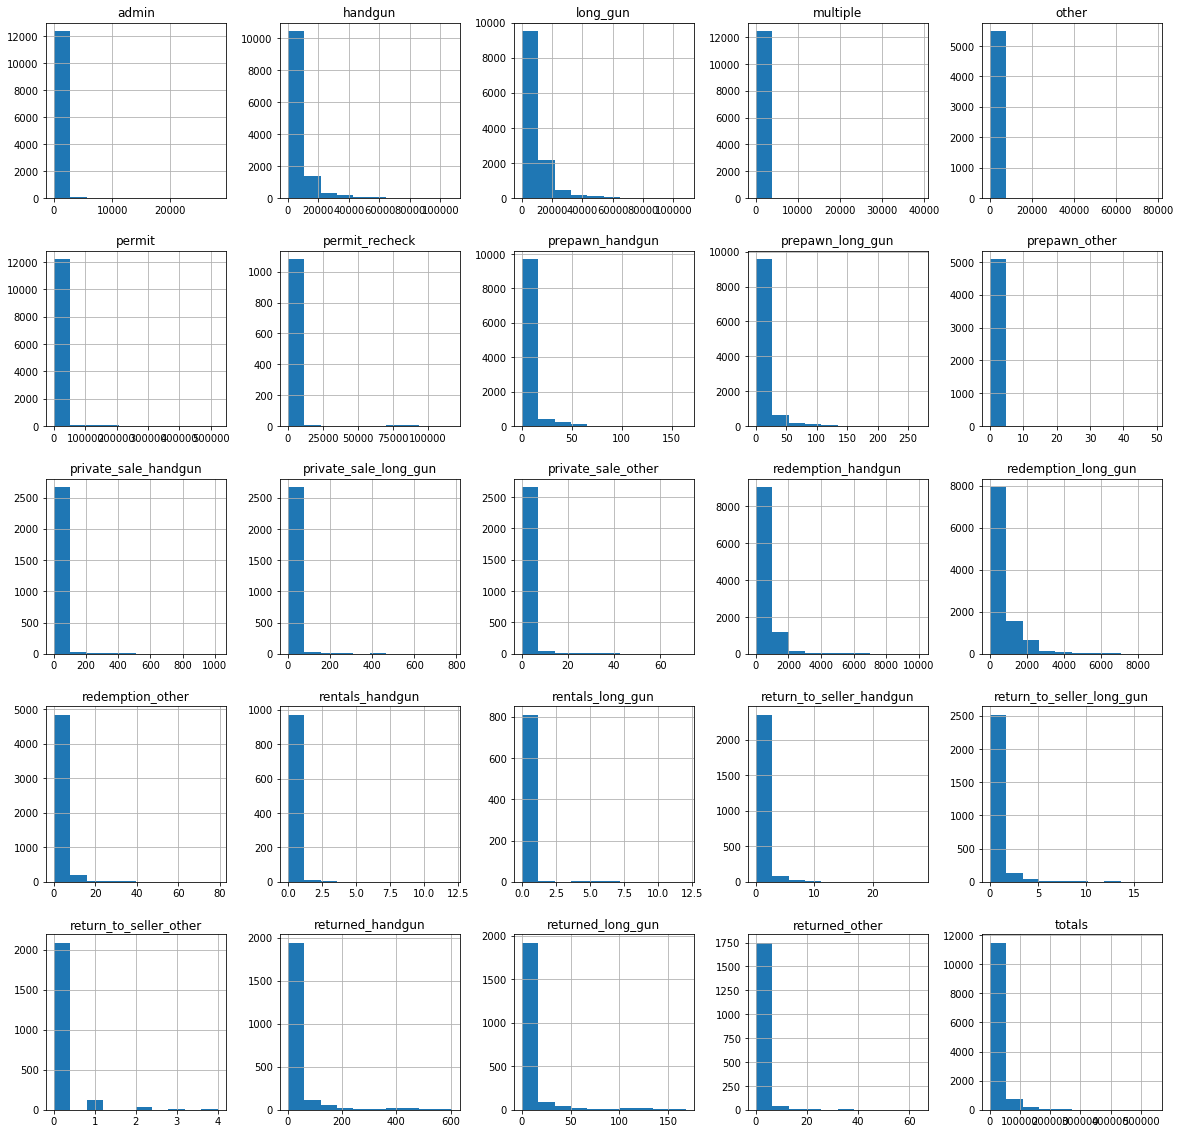

In [124]:
df_gun.hist(figsize=(20,20));

In [125]:
df_gun.shape, df_census.shape

((12485, 27), (64, 52))

<a id='cleaning'></a>
# Cleaning Dataset
**We have to remove any possible duplicates, give proper types to the data and see if the gun data and census data correspond together with quantity and quality.**

In [126]:
#Since both data sets were read perfectly it is time to clean the data sets in order to properly carry out an analysis.
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [127]:
type(df_gun['month'][0])
type(df_gun['state'][0])

str

**Eventhough month and state are illustrated as an object type, when we run an individual type code we can see it being illustrated as a string.** 

In [128]:
df_gun.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

**We can see that 'month' and 'state' has the same count as 'totals' unlike all the other numbers. This suggests that some of the values are Null-Values or have not been mentioned at all.**

In [129]:
sum(df_census.duplicated())

0

In [130]:
sum(df_gun.duplicated())

0

In [131]:
df_census.isnull().sum().any()

True

In [132]:
df_gun.isnull().sum().any()

True

In [133]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
Fact              64 non-null object
Fact Note         16 non-null object
Alabama           64 non-null object
Alaska            64 non-null object
Arizona           64 non-null object
Arkansas          64 non-null object
California        64 non-null object
Colorado          64 non-null object
Connecticut       64 non-null object
Delaware          64 non-null object
Florida           64 non-null object
Georgia           64 non-null object
Hawaii            64 non-null object
Idaho             64 non-null object
Illinois          64 non-null object
Indiana           64 non-null object
Iowa              64 non-null object
Kansas            64 non-null object
Kentucky          64 non-null object
Louisiana         64 non-null object
Maine             64 non-null object
Maryland          64 non-null object
Massachusetts     64 non-null object
Michigan          64 non-null object
Minnesota

In [134]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [135]:
df_census.dtypes

Fact               object
Fact Note          object
Alabama            object
Alaska             object
Arizona            object
Arkansas           object
California         object
Colorado           object
Connecticut        object
Delaware           object
Florida            object
Georgia            object
Hawaii             object
Idaho              object
Illinois           object
Indiana            object
Iowa               object
Kansas             object
Kentucky           object
Louisiana          object
Maine              object
Maryland           object
Massachusetts      object
Michigan           object
Minnesota          object
Mississippi        object
Missouri           object
Montana            object
Nebraska           object
Nevada             object
New Hampshire      object
New Jersey         object
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon      

In [136]:
#Now we are only selecting the columns that we will be needing to do an analysis.

df_gun1 = df_gun[['month','state','totals']]
df_gun1

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506
...,...,...,...
12480,1998-11,Virginia,24
12481,1998-11,Washington,361
12482,1998-11,West Virginia,408
12483,1998-11,Wisconsin,241


**Since all the data inside census data is listed as object type, we will need to change them into numeric later**

In [137]:
# Make sure that the census data does not start the index with the 'fact' or 'fact note'. 
index_census_state = df_census.iloc[0].index
index_census_state

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [138]:
index_census_state = index_census_state[2:]
index_census_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [139]:
len(index_census_state)

50

In [140]:
# Now checking the same for the gun data

index_gun_state = df_gun.groupby('state').sum().index

In [141]:
index_gun_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [142]:
len(index_gun_state)

55

**Both data sets do not have the equivalent amount of 'states' listed. Since the code before showed us that there were no duplicates and null values we need to check if some states have not been mentioned.**

In [143]:
for s in index_gun_state:
    if s not in index_census_state:
            print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


**Now we can see precisely which states are not included in the gun data and furthermore have to be taken into account(excluded) in the future analysis.**

<a id='analysis'></a>
# Exploratory Data Analysis

**1. What is the overall trend of gun purchases?**

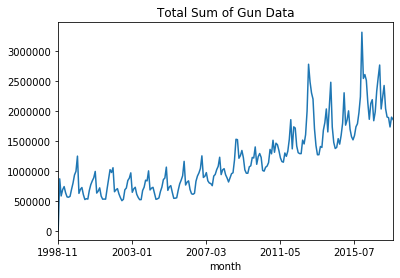

In [144]:
# sum the totals by month
totals_sum = df_gun.groupby('month')['totals'].sum()

totals_sum.plot(x= 'totals', y= 'month', title = 'Total Sum of Gun Data', kind ='line')


**By looking at this graph we can clearly see an increase in overall gun sales from the year 1998 to 2007. Although the trend was more or less stable in the period of 1998 and 2003, the growth started to show an increase around year 2005 where closer to 2011 we can see that it hit the highest peak. Later on it was jumping up and down untill 2015 where a new peak has been established higher than the one in 2015.**

**2. How many permit rechecks have their been per month? or **

In [145]:
df_gun.iloc[:, [0,2]]

,month,permit
0,2017-09,16717.0
1,2017-09,209.0
2,2017-09,5069.0
3,2017-09,2935.0
4,2017-09,57839.0
...,...,...
12480,1998-11,0.0
12481,1998-11,1.0
12482,1998-11,3.0
12483,1998-11,0.0


In [146]:
total_rechecks = df_gun.groupby('month')['permit_recheck'].sum()
total_rechecks

month
1998-11        0.0
1998-12        0.0
1999-01        0.0
1999-02        0.0
1999-03        0.0
            ...   
2017-05    79404.0
2017-06    71398.0
2017-07    71040.0
2017-08    85237.0
2017-09    76567.0
Name: permit_recheck, Length: 227, dtype: float64

**It is impossible to answer this questions because most of the data is not filled, therefore we can not properly answer this question.**

**3. What is the population that falls under the category of age below 18, on April 1st, 2010?** 

In [147]:
df_census.iloc [7, 2:]

Alabama           23.70%
Alaska            26.40%
Arizona           25.50%
Arkansas          24.40%
California        25.00%
Colorado          24.40%
Connecticut       22.90%
Delaware          22.90%
Florida           21.30%
Georgia           25.70%
Hawaii            22.30%
Idaho             27.40%
Illinois          24.40%
Indiana           24.80%
Iowa              23.90%
Kansas            25.50%
Kentucky          23.60%
Louisiana         24.70%
Maine             20.70%
Maryland          23.40%
Massachusetts     21.70%
Michigan          23.70%
Minnesota         24.20%
Mississippi       25.50%
Missouri          23.80%
Montana           22.60%
Nebraska          25.10%
Nevada            24.60%
New Hampshire     21.80%
New Jersey        23.50%
New Mexico         0.252
New York           0.223
North Carolina     0.239
North Dakota       0.223
Ohio               0.237
Oklahoma           0.248
Oregon             0.226
Pennsylvania        0.22
Rhode Island       0.213
South Carolina     0.234


**By looking at this data we can clearly see that the highest number of population below age 18 goes to Utah with %31.50 and the lowest number is in Rhode Island with the %0.213.**

**4. What was the state with the lowest percentage for Asians Alone?**

In [148]:
df_census.iloc [15, 2:]

Alabama            1.40%
Alaska             6.30%
Arizona            3.40%
Arkansas           1.60%
California        14.80%
Colorado           3.30%
Connecticut        4.70%
Delaware           4.00%
Florida            2.90%
Georgia            4.10%
Hawaii            37.70%
Idaho              1.50%
Illinois           5.50%
Indiana            2.20%
Iowa               2.50%
Kansas             3.00%
Kentucky           1.50%
Louisiana          1.80%
Maine              1.20%
Maryland           6.60%
Massachusetts      6.70%
Michigan           3.10%
Minnesota          4.90%
Mississippi        1.10%
Missouri           2.00%
Montana            0.80%
Nebraska           2.50%
Nevada             8.70%
New Hampshire      2.70%
New Jersey         9.80%
New Mexico         0.017
New York           0.089
North Carolina     0.029
North Dakota       0.015
Ohio               0.022
Oklahoma           0.022
Oregon             0.045
Pennsylvania       0.035
Rhode Island       0.036
South Carolina     0.016


**By looking at this data we can clearly see that the highest number of population with Asians Alone goes Hawaii with %37.70 and the lowest numbers are in both South and North Dakota with %0.015.**

**5. How many guns were registered in the year 2017, January? What is that number compared to the data 10 years ago?**

In [149]:
gun_jan2017 =df_gun.query('month == "2017-09"')
gun_jan2017

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [150]:
gun_jan2017.groupby(['month'])['totals'].sum()

month
2017-09    1857226
Name: totals, dtype: int64

In [151]:
gun_jan2007 = df_gun.query('month == "2007-12"')
gun_jan2007

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
6435,2007-12,Alabama,0.0,NaN,10877.0,23192.0,NaN,461,0.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37499
6436,2007-12,Alaska,0.0,NaN,2227.0,3234.0,NaN,98,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5754
6437,2007-12,Arizona,1888.0,NaN,7678.0,9370.0,NaN,331,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191
6438,2007-12,Arkansas,2555.0,NaN,4741.0,13939.0,NaN,247,7.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23434
6439,2007-12,California,23638.0,NaN,18279.0,20378.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62295
6440,2007-12,Colorado,1.0,NaN,9359.0,14562.0,NaN,1921,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25846
6441,2007-12,Connecticut,4398.0,NaN,3077.0,3558.0,NaN,75,379.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11487
6442,2007-12,Delaware,0.0,NaN,597.0,1508.0,NaN,27,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2132
6443,2007-12,District of Columbia,0.0,NaN,1.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6444,2007-12,Florida,0.0,NaN,23703.0,24625.0,NaN,917,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50129


In [152]:
gun_jan2007.groupby(['month'])['totals'].sum()

month
2007-12    1229610
Name: totals, dtype: int64

**We can see that even though 2017 didnt have last three months inside the data, it still shows a greater number compared to 2007, which indicates that overall the gun sales have been steadily growing**

**6. What is the most popular gun sale in the whole data?**

In [153]:
gun_type = {}
column_state = df_gun.columns[2:25]

for c in column_state:
    gun_type[c] = df_gun[c].sum()
    
max(gun_type, key=gun_type.get)

'long_gun'

**This shows that 'long_gun' is the most popular gun among others**

<a id='conclusion'></a>
# Conclusion

        **Overall, we could perfectly run both datas and see the numbers that were corresponding for each data type. The gun data has been ongoing since 1998, however the problem was that most of the latest data had 0 for some of the categories. Therefore, the speculations can not be made since there is a possibility that those numbers were not properly written. If we drop the null value it will repove that specific row and therefore effect the data. However, if we are precise with our commands we can answer our questions.
        Regarding the census, it shows different population categories. It was useful to run some commands in order to test yourself how to 'play' with different rows and columns. The only negative aspect, is that it is hard to link census data to gun data. Primarily because the data is so different, and most likely census is missing that gun correlation for the proper similarities and differences to be constructed.**